In [1]:
import pandas as pd

# Sample dataset of tweets
data = {
    'tweet': [
        "I love the new features of Brand X!",
        "Brand X is the worst. I'm so disappointed.",
        "The customer service from Brand X is amazing!",
        "I had a terrible experience with Brand X.",
        "Brand X is okay, but it could be better.",
        "Absolutely fantastic! Brand X exceeded my expectations.",
        "I will never buy from Brand X again.",
        "Brand X has great products, but the price is too high.",
        "I'm neutral about Brand X.",
        "Brand X is my go-to brand for everything!"
    ]
}

tweets_df = pd.DataFrame(data)

In [2]:
import re

# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#', '', tweet)  # Remove mentions and hashtags
    tweet = tweet.strip()  # Remove leading and trailing spaces
    return tweet

# Clean the tweets
tweets_df['cleaned_tweet'] = tweets_df['tweet'].apply(clean_tweet)

In [3]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
tweets_df['sentiment'] = tweets_df['cleaned_tweet'].apply(get_sentiment)

# Display the DataFrame with sentiments
print(tweets_df)

                                               tweet  \
0                I love the new features of Brand X!   
1         Brand X is the worst. I'm so disappointed.   
2      The customer service from Brand X is amazing!   
3          I had a terrible experience with Brand X.   
4           Brand X is okay, but it could be better.   
5  Absolutely fantastic! Brand X exceeded my expe...   
6               I will never buy from Brand X again.   
7  Brand X has great products, but the price is t...   
8                         I'm neutral about Brand X.   
9          Brand X is my go-to brand for everything!   

                                       cleaned_tweet sentiment  
0                I love the new features of Brand X!  Positive  
1         Brand X is the worst. I'm so disappointed.  Negative  
2      The customer service from Brand X is amazing!  Positive  
3          I had a terrible experience with Brand X.  Negative  
4           Brand X is okay, but it could be better.  Posi

<ipython-input-4-0312b28350f1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


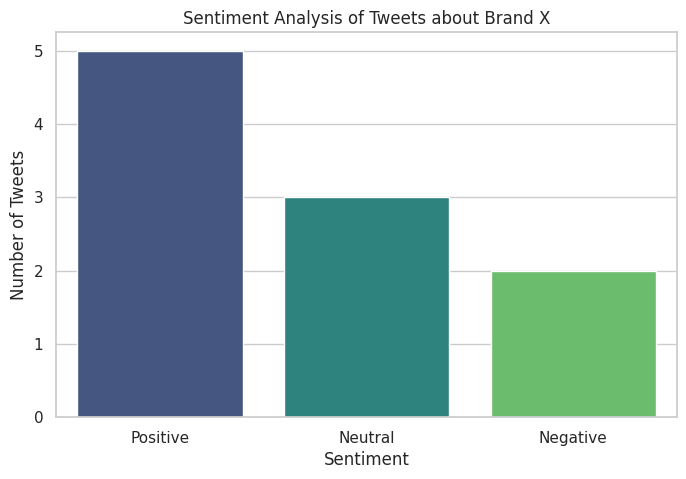

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Count the sentiment occurrences
sentiment_counts = tweets_df['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of Tweets about Brand X')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()